In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../final_table.csv")



# Dataset Overview

## Causes

First we look at the distribution of primary causes as categorised by the AI based on the conclusion sections of the reports:

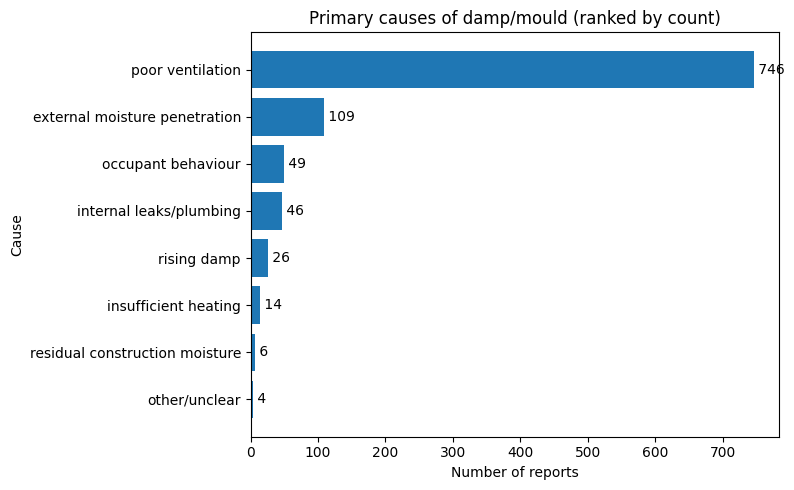

In [2]:

# Pick the column to rank
col = "cause_primary"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Primary causes of damp/mould (ranked by count)")
plt.xlabel("Number of reports")
plt.ylabel("Cause")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

Next we look at the primary and secondary causes together in a table: 

In [3]:
# Number of reports where each cause is mentioned as either primary or secondary cause:
import pandas as pd

# Count for primary causes
primary_counts = df['cause_primary'].value_counts().rename("primary")

# Count for secondary causes
secondary_counts = df['cause_secondary'].value_counts().rename("secondary")

# Combine into one table
cause_table = pd.concat([primary_counts, secondary_counts], axis=1).fillna(0)

# Add total column
cause_table["total"] = cause_table["primary"] + cause_table["secondary"]

# Make sure counts are integers
cause_table = cause_table.astype(int)
display(cause_table)

,primary,secondary,total
poor ventilation,746,130,876
external moisture penetration,109,140,249
occupant behaviour,49,203,252
internal leaks/plumbing,46,94,140
rising damp,26,64,90
insufficient heating,14,28,42
residual construction moisture,6,21,27
other/unclear,4,17,21
none,0,303,303


## Ventilation Systems

Here we see the distribution of the detected ventilation systems in the reports

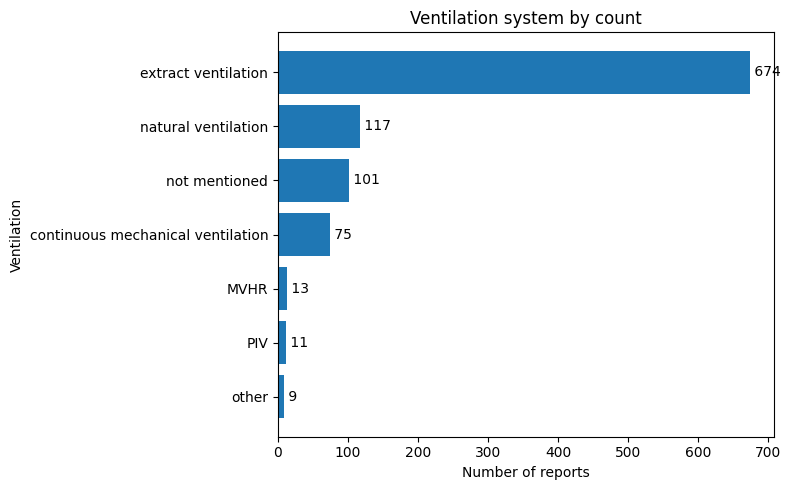

In [4]:

# Pick the column to rank
col = "ventilation_categorised"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Ventilation system by count")
plt.xlabel("Number of reports")
plt.ylabel("Ventilation")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

## Property type

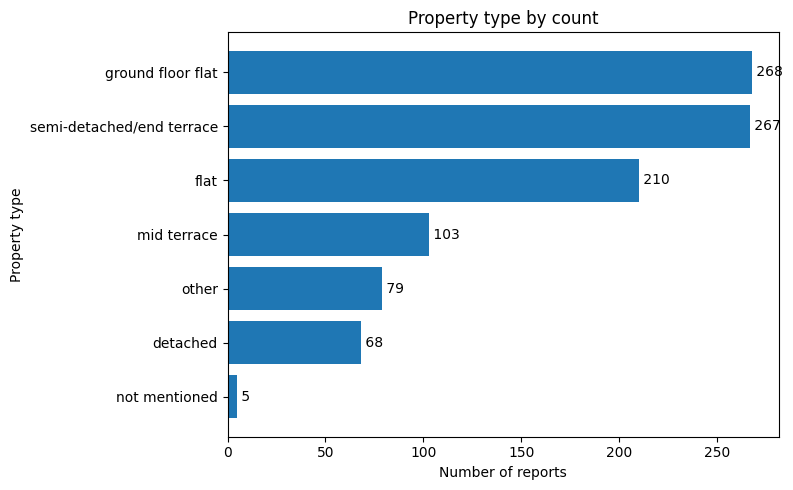

In [5]:

# Pick the column to rank
col = "property_type_categorised"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Property type by count")
plt.xlabel("Number of reports")
plt.ylabel("Property type")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

## Wall type

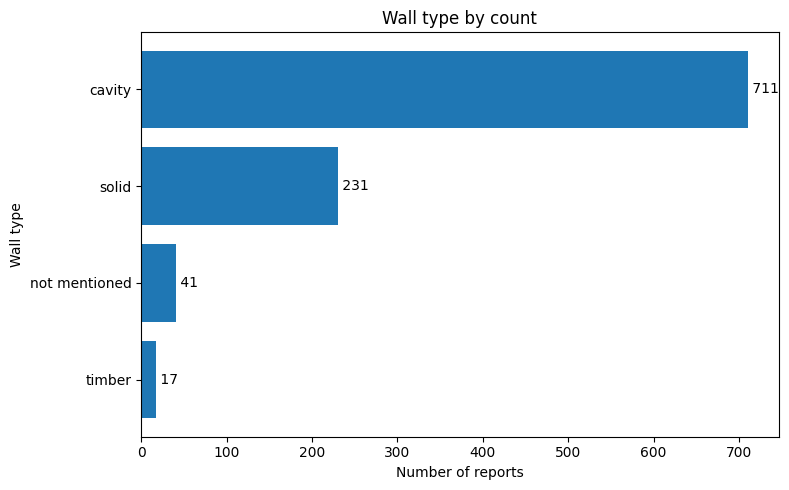

In [6]:

# Pick the column to rank
col = "wall_type"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Wall type by count")
plt.xlabel("Number of reports")
plt.ylabel("Wall type")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

## Window Type

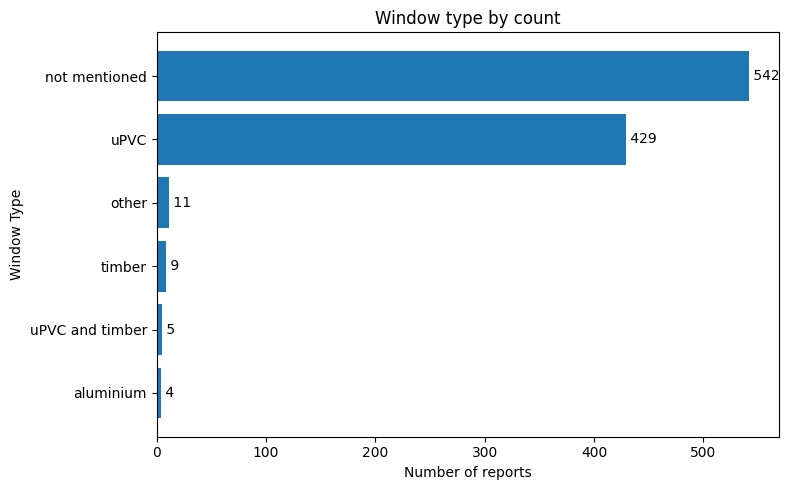

In [7]:
# Pick the column to rank
col = "window_type_categorised"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("Window type by count")
plt.xlabel("Number of reports")
plt.ylabel("Window Type")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

## Drying Clothes

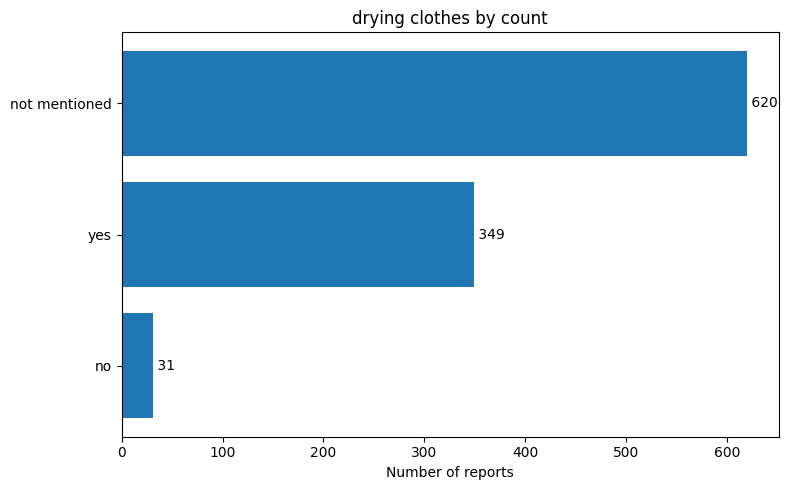

In [8]:
# Pick the column to rank
col = "drying_clothes"

# Counts (sorted)
counts = df[col].value_counts().sort_values(ascending=True)

# Plot: ranked horizontal bar chart (counts)
plt.figure(figsize=(8, 5))
plt.barh(counts.index, counts.values)
plt.title("drying clothes by count")
plt.xlabel("Number of reports")
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")  # annotate counts
plt.tight_layout()
plt.show()

## Issue locations

Here we see the locations of the issue. There is data for the main issue location and the secondary issue location, so we show here both of these distributions as well as them combined (which shows the number of reports where a given location has the issue at all)

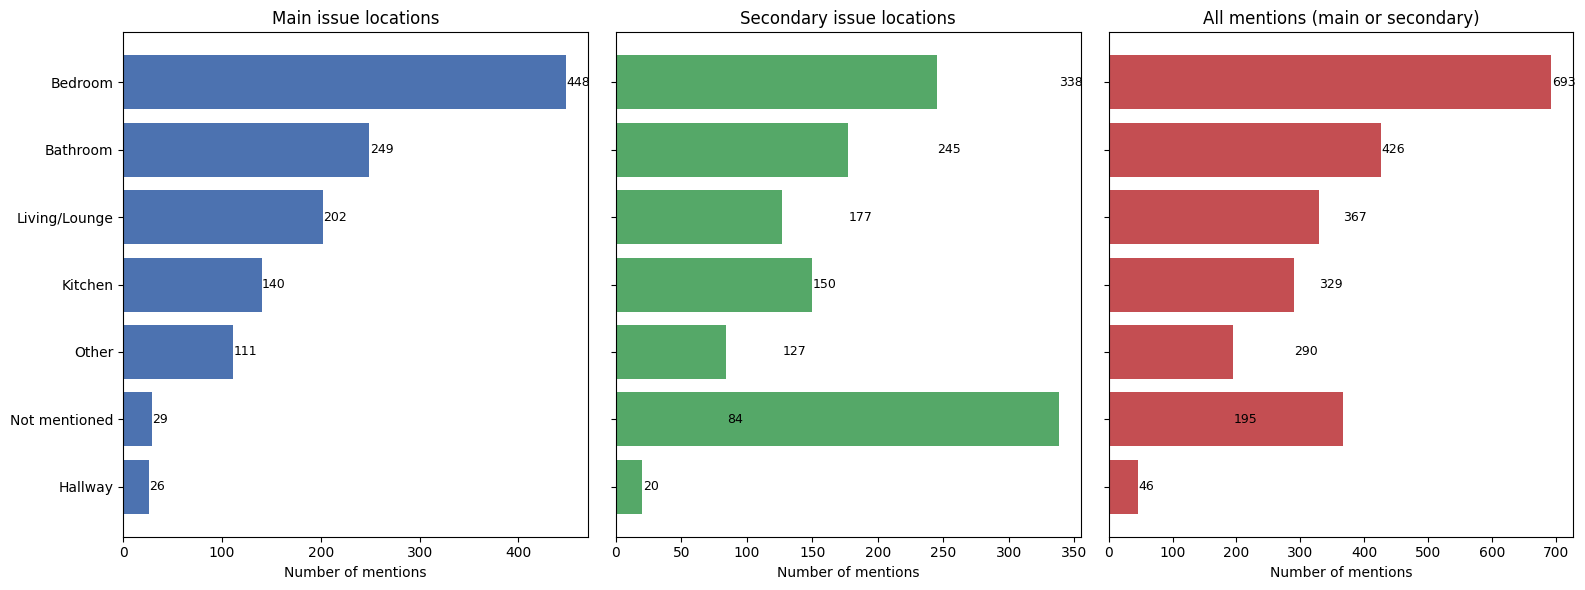

In [9]:
import sys
sys.path.append("../src")

from categorise_locations import categorise_location_multiple
import matplotlib.pyplot as plt
import pandas as pd

# --- 1️⃣ Categorise main and secondary issue locations ---

df["main_issue_location_categorised"] = (
    df["main_issue_location"]
    .apply(categorise_location_multiple)
    .apply(lambda x: ", ".join(x))
)

df["secondary_issue_location_categorised"] = (
    df["secondary_issue_locations"]
    .apply(categorise_location_multiple)
    .apply(lambda x: ", ".join(x))
)

# --- 2️⃣ Explode comma-separated strings into lists and combine ---

main_exploded = df["main_issue_location_categorised"].str.split(", ").explode()
secondary_exploded = df["secondary_issue_location_categorised"].str.split(", ").explode()
combined_exploded = pd.concat([main_exploded, secondary_exploded])

# --- 3️⃣ Count occurrences ---
main_counts = main_exploded.value_counts().sort_values(ascending=True)
secondary_counts = secondary_exploded.value_counts().sort_values(ascending=True)
combined_counts = combined_exploded.value_counts().sort_values(ascending=True)

# --- 4️⃣ Create three subplots in one figure ---
fig, axes = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

# Plot: Main
axes[0].barh(main_counts.index, main_counts.values, color="#4C72B0")
axes[0].set_title("Main issue locations")
axes[0].set_xlabel("Number of mentions")
for i, v in enumerate(main_counts.values):
    axes[0].text(v + 0.5, i, str(v), va="center", fontsize=9)

# Plot: Secondary
axes[1].barh(secondary_counts.index, secondary_counts.values, color="#55A868")
axes[1].set_title("Secondary issue locations")
axes[1].set_xlabel("Number of mentions")
for i, v in enumerate(secondary_counts.values):
    axes[1].text(v + 0.5, i, str(v), va="center", fontsize=9)

# Plot: Combined
axes[2].barh(combined_counts.index, combined_counts.values, color="#C44E52")
axes[2].set_title("All mentions (main or secondary)")
axes[2].set_xlabel("Number of mentions")
for i, v in enumerate(combined_counts.values):
    axes[2].text(v + 0.5, i, str(v), va="center", fontsize=9)

# --- 5️⃣ Tidy layout ---
plt.tight_layout()
plt.show()



# Property type profiles

## Overview

First we can look at the general overview of all property types compared with primary causes, using a heatmap

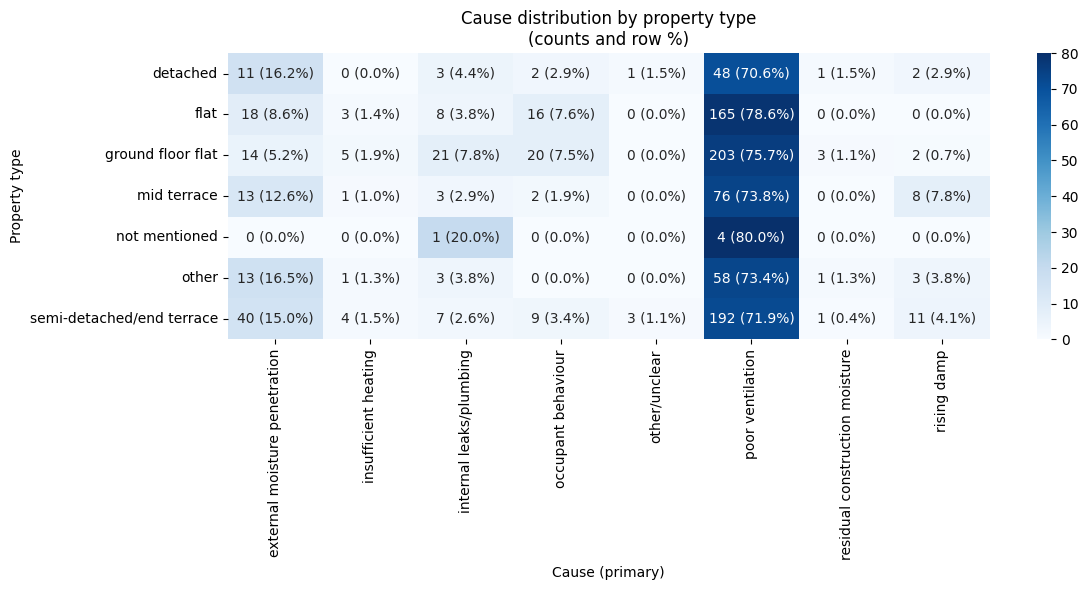

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

ct_counts = pd.crosstab(df["property_type_categorised"], df["cause_primary"])
ct_pct = (ct_counts.div(ct_counts.sum(axis=1), axis=0) * 100).round(1)

plt.figure(figsize=(12,6))
sns.heatmap(ct_pct, annot=ct_counts.astype(str) + " (" + ct_pct.astype(str) + "%)", fmt="", cmap="Blues")
plt.title("Cause distribution by property type\n(counts and row %)")
plt.ylabel("Property type")
plt.xlabel("Cause (primary)")
plt.tight_layout()
plt.show()

In [12]:


def feature_summary_table(df, subset_df, column, label, plot=True):
    """
    Compare distribution of a categorical feature between subset and full dataset.

    Parameters
    ----------
    df : pd.DataFrame
        Full dataset.
    subset_df : pd.DataFrame
        Subset of interest (e.g. ground floor flats).
    column : str
        Column to summarise.
    label : str
        Name for the subset (used in labels/titles).
    plot : bool
        If True, produce a side-by-side comparison bar chart.

    Returns
    -------
    pd.DataFrame
        Summary table.
    """
    # --- Data prep ---
    subset_counts = subset_df[column].value_counts(dropna=False)
    subset_perc = subset_counts / subset_counts.sum() * 100

    full_counts = df[column].value_counts(dropna=False)
    full_perc = full_counts / full_counts.sum() * 100

    summary = pd.DataFrame({
        "Count": subset_counts,
        f"% of {label}": subset_perc,
        "% of All Properties": full_perc
    }).fillna(0).round(1)
    summary.index.name = column

    # --- Plotting ---
    if plot:
        summary_sorted = summary.sort_values(by=f"% of {label}", ascending=True)

        categories = np.arange(len(summary_sorted))
        bar_height = 0.35  # adjust spacing between bars

        plt.figure(figsize=(7, 4))
        plt.barh(categories - bar_height/2, summary_sorted[f"% of {label}"], 
                 height=bar_height, label=label, alpha=0.8)
        plt.barh(categories + bar_height/2, summary_sorted["% of All Properties"], 
                 height=bar_height, label="All Properties", alpha=0.8)

        plt.yticks(categories, summary_sorted.index)
        plt.title(f"{column.replace('_', ' ').title()} Comparison: {label} vs All Properties")
        plt.xlabel("Percentage of properties")
        plt.legend()
        plt.tight_layout()
        plt.show()

    return summary

In [13]:
def profile_by_feature(df, feature_col, feature_value):
    subset = df[df[feature_col] == feature_value]
    total = len(df)
    n = len(subset)
    print(f"Profile: {feature_value}")
    print(f"Number of reports: {n} ({n/total:.1%} of total)")
    return subset

In [29]:
def compare_issue_locations(df, property_type_label):
    subset_df = df[df["property_type_categorised"] == property_type_label]
    subset_main = subset_df["main_issue_location_categorised"].str.split(", ").explode()
    full_main = df["main_issue_location_categorised"].str.split(", ").explode()

    subset_counts = subset_main.value_counts(normalize=True) * 100
    full_counts = full_main.value_counts(normalize=True) * 100

    compare = pd.concat([subset_counts, full_counts], axis=1, keys=[property_type_label, "All"]).fillna(0)
    compare = compare.sort_values(property_type_label, ascending=True)

    # Plot
    bar_height = 0.35
    locs = np.arange(len(compare))
    plt.figure(figsize=(8, 5))
    plt.barh(locs - bar_height/2, compare[property_type_label], height=bar_height, label=property_type_label, color="#4C72B0")
    plt.barh(locs + bar_height/2, compare["All"], height=bar_height, label="All properties", color="#C44E52")
    plt.yticks(locs, compare.index)
    plt.xlabel("Percentage of mentions (main issue location)")
    plt.title(f"Issue location distribution: {property_type_label} vs All properties")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return compare.round(1)

## Ground floor flats profile

Profile: ground floor flat
Number of reports: 268 (26.8% of total)


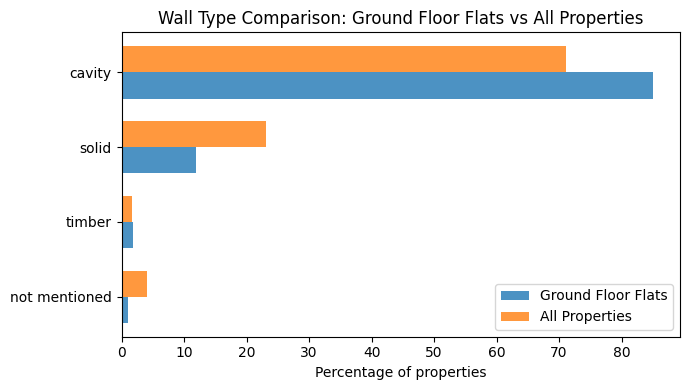

,Count,% of Ground Floor Flats,% of All Properties
wall_type,,,
cavity,228,85.1,71.1
not mentioned,3,1.1,4.1
solid,32,11.9,23.1
timber,5,1.9,1.7


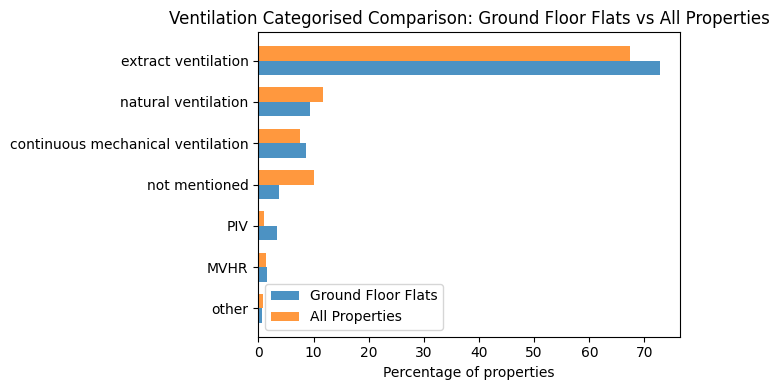

,Count,% of Ground Floor Flats,% of All Properties
ventilation_categorised,,,
MVHR,4,1.5,1.3
PIV,9,3.4,1.1
continuous mechanical ventilation,23,8.6,7.5
extract ventilation,195,72.8,67.4
natural ventilation,25,9.3,11.7
not mentioned,10,3.7,10.1
other,2,0.7,0.9


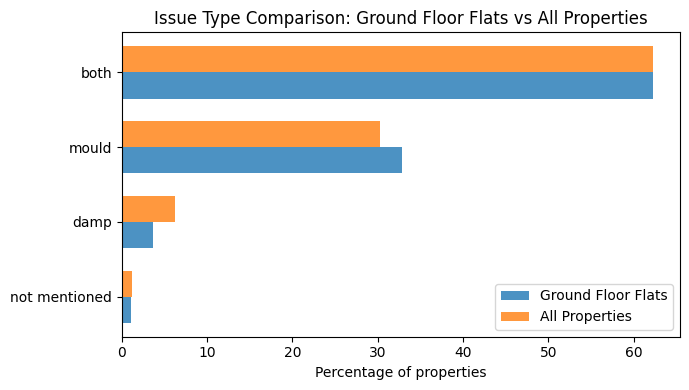

,Count,% of Ground Floor Flats,% of All Properties
issue_type,,,
both,167,62.3,62.3
mould,88,32.8,30.3
damp,10,3.7,6.2
not mentioned,3,1.1,1.2


In [33]:
ground_flat_df = profile_by_feature(df, "property_type_categorised", "ground floor flat")

# Generate tables
for col in ["wall_type", "ventilation_categorised", "issue_type"]:
    display(feature_summary_table(df, ground_flat_df, col, "Ground Floor Flats"))
    print("\n")


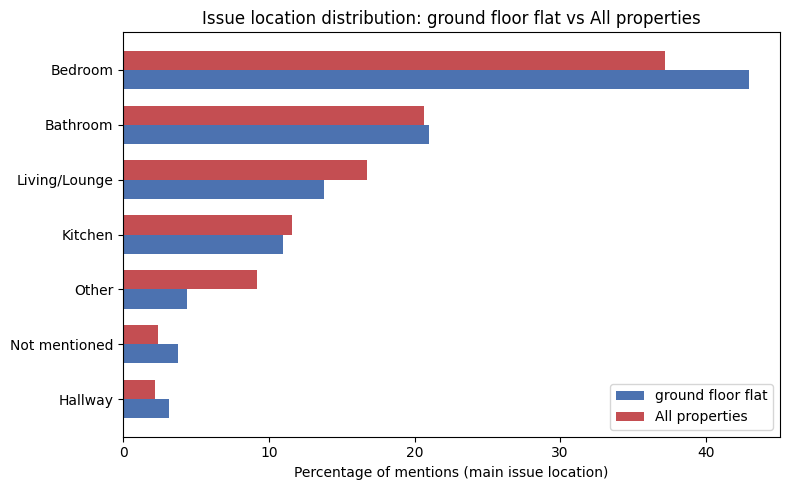

,ground floor flat,All
main_issue_location_categorised,,
Hallway,3.1,2.2
Not mentioned,3.8,2.4
Other,4.4,9.2
Kitchen,11.0,11.6
Living/Lounge,13.8,16.8
Bathroom,21.0,20.7
Bedroom,42.9,37.2


In [31]:
compare_issue_locations(df, "ground floor flat")

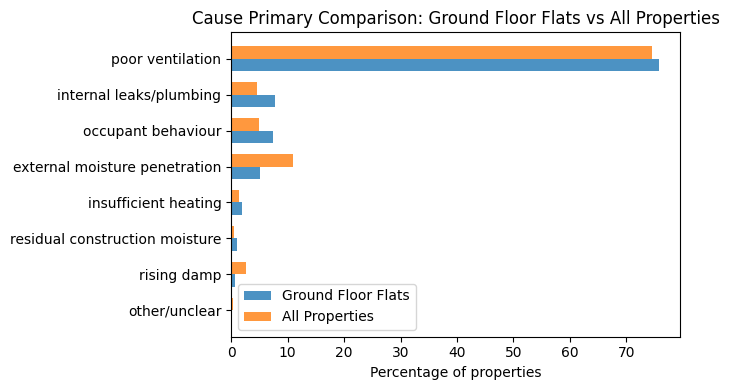

,Count,% of Ground Floor Flats,% of All Properties
cause_primary,,,
external moisture penetration,14.0,5.2,10.9
insufficient heating,5.0,1.9,1.4
internal leaks/plumbing,21.0,7.8,4.6
occupant behaviour,20.0,7.5,4.9
other/unclear,0.0,0.0,0.4
poor ventilation,203.0,75.7,74.6
residual construction moisture,3.0,1.1,0.6
rising damp,2.0,0.7,2.6


In [34]:
display(feature_summary_table(df, ground_flat_df, "cause_primary", "Ground Floor Flats"))

## Mid terrace profile

Profile: mid terrace
Number of reports: 103 (10.3% of total)


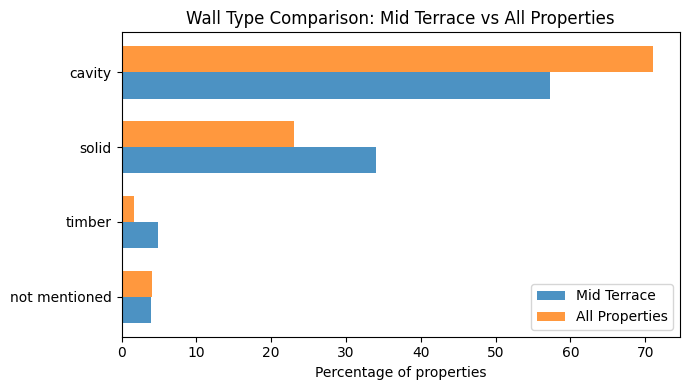

,Count,% of Mid Terrace,% of All Properties
wall_type,,,
cavity,59,57.3,71.1
not mentioned,4,3.9,4.1
solid,35,34.0,23.1
timber,5,4.9,1.7


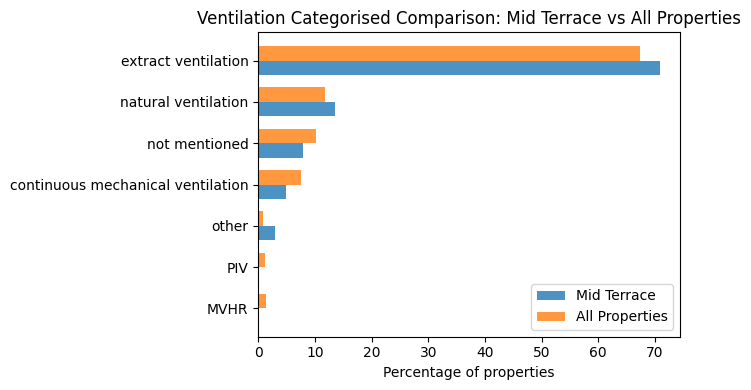

,Count,% of Mid Terrace,% of All Properties
ventilation_categorised,,,
MVHR,0.0,0.0,1.3
PIV,0.0,0.0,1.1
continuous mechanical ventilation,5.0,4.9,7.5
extract ventilation,73.0,70.9,67.4
natural ventilation,14.0,13.6,11.7
not mentioned,8.0,7.8,10.1
other,3.0,2.9,0.9


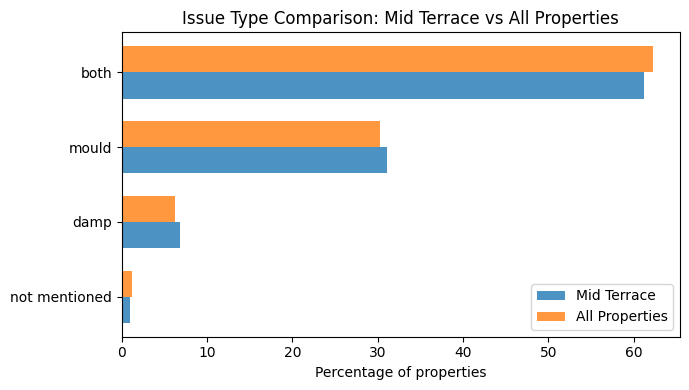

,Count,% of Mid Terrace,% of All Properties
issue_type,,,
both,63,61.2,62.3
mould,32,31.1,30.3
damp,7,6.8,6.2
not mentioned,1,1.0,1.2


In [37]:
mid_terrace_df = profile_by_feature(df, "property_type_categorised", "mid terrace")

# Generate tables
for col in ["wall_type", "ventilation_categorised", "issue_type"]:
    display(feature_summary_table(df, mid_terrace_df, col, "Mid Terrace"))
    print("\n")

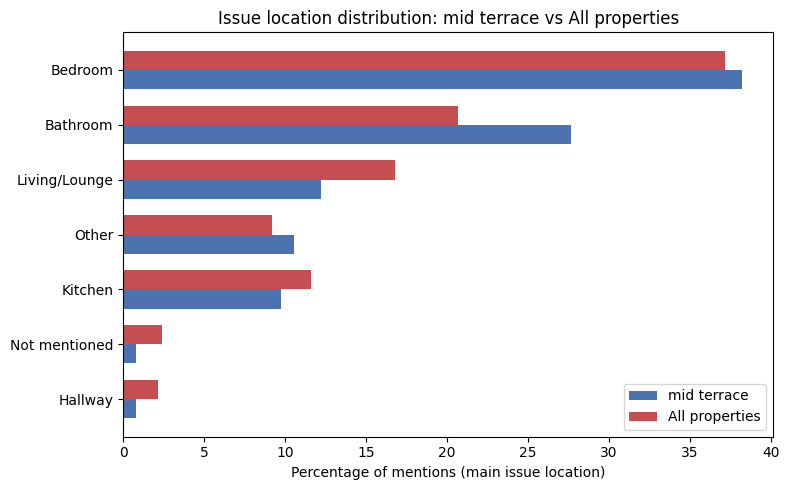

,mid terrace,All
main_issue_location_categorised,,
Hallway,0.8,2.2
Not mentioned,0.8,2.4
Kitchen,9.8,11.6
Other,10.6,9.2
Living/Lounge,12.2,16.8
Bathroom,27.6,20.7
Bedroom,38.2,37.2


In [38]:
compare_issue_locations(df, "mid terrace")

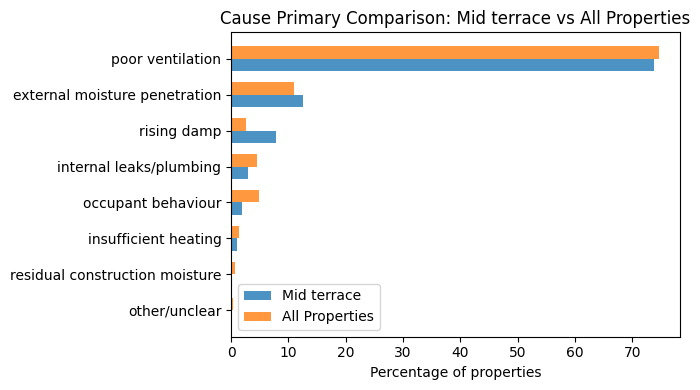

,Count,% of Mid terrace,% of All Properties
cause_primary,,,
external moisture penetration,13.0,12.6,10.9
insufficient heating,1.0,1.0,1.4
internal leaks/plumbing,3.0,2.9,4.6
occupant behaviour,2.0,1.9,4.9
other/unclear,0.0,0.0,0.4
poor ventilation,76.0,73.8,74.6
residual construction moisture,0.0,0.0,0.6
rising damp,8.0,7.8,2.6


In [39]:
display(feature_summary_table(df, mid_terrace_df, "cause_primary", "Mid terrace"))

## flat profile

Profile: flat
Number of reports: 210 (21.0% of total)


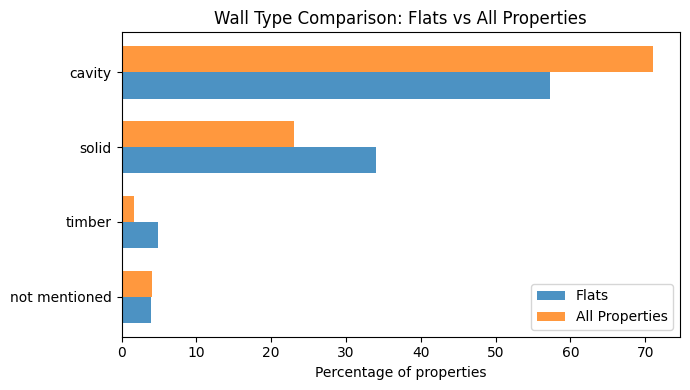

,Count,% of Flats,% of All Properties
wall_type,,,
cavity,59,57.3,71.1
not mentioned,4,3.9,4.1
solid,35,34.0,23.1
timber,5,4.9,1.7


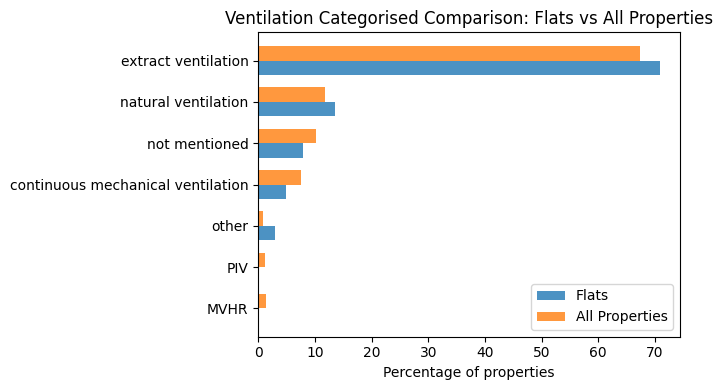

,Count,% of Flats,% of All Properties
ventilation_categorised,,,
MVHR,0.0,0.0,1.3
PIV,0.0,0.0,1.1
continuous mechanical ventilation,5.0,4.9,7.5
extract ventilation,73.0,70.9,67.4
natural ventilation,14.0,13.6,11.7
not mentioned,8.0,7.8,10.1
other,3.0,2.9,0.9


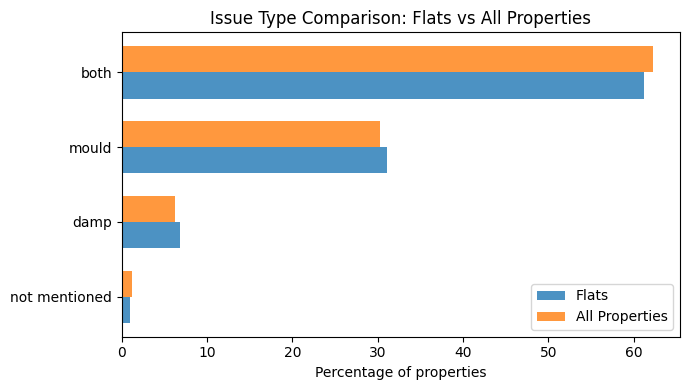

,Count,% of Flats,% of All Properties
issue_type,,,
both,63,61.2,62.3
mould,32,31.1,30.3
damp,7,6.8,6.2
not mentioned,1,1.0,1.2


In [40]:
flat_df = profile_by_feature(df, "property_type_categorised", "flat")

# Generate tables
for col in ["wall_type", "ventilation_categorised", "issue_type"]:
    display(feature_summary_table(df, mid_terrace_df, col, "Flats"))
    print("\n")


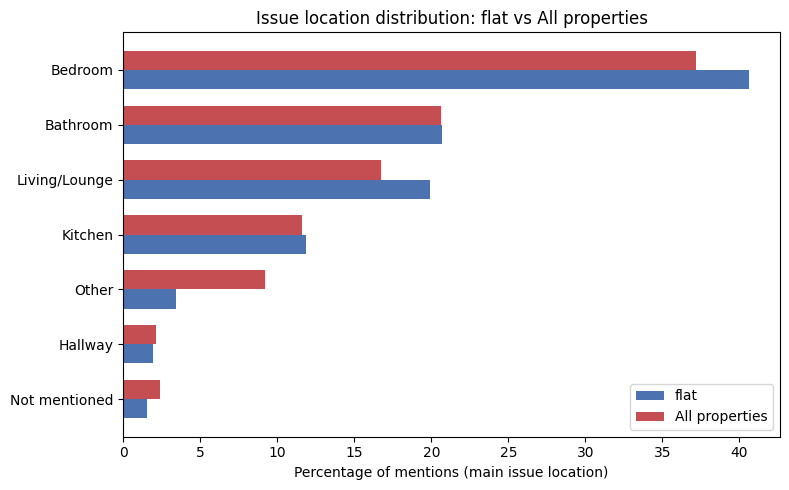

,flat,All
main_issue_location_categorised,,
Not mentioned,1.5,2.4
Hallway,1.9,2.2
Other,3.4,9.2
Kitchen,11.9,11.6
Living/Lounge,19.9,16.8
Bathroom,20.7,20.7
Bedroom,40.6,37.2


In [41]:
compare_issue_locations(df, "flat")

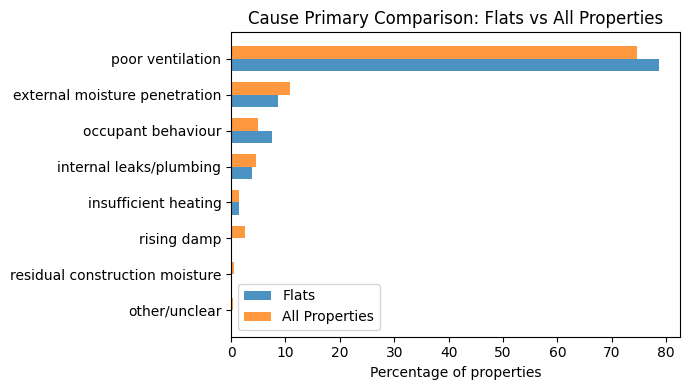

,Count,% of Flats,% of All Properties
cause_primary,,,
external moisture penetration,18.0,8.6,10.9
insufficient heating,3.0,1.4,1.4
internal leaks/plumbing,8.0,3.8,4.6
occupant behaviour,16.0,7.6,4.9
other/unclear,0.0,0.0,0.4
poor ventilation,165.0,78.6,74.6
residual construction moisture,0.0,0.0,0.6
rising damp,0.0,0.0,2.6


In [42]:
display(feature_summary_table(df, flat_df, "cause_primary", "Flats"))

## semi detached/end terrace profile

Profile: semi-detached/end terrace
Number of reports: 267 (26.7% of total)


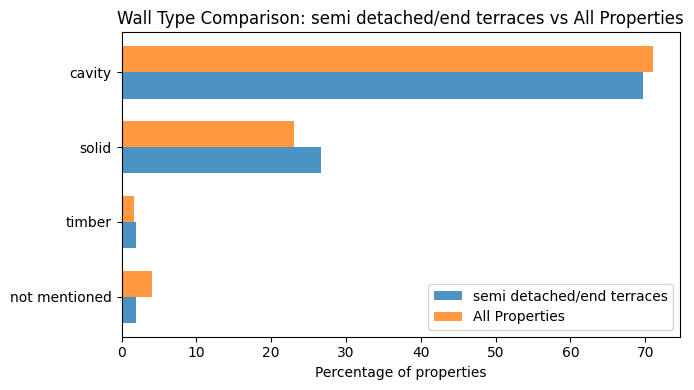

,Count,% of semi detached/end terraces,% of All Properties
wall_type,,,
cavity,186,69.7,71.1
solid,71,26.6,23.1
not mentioned,5,1.9,4.1
timber,5,1.9,1.7


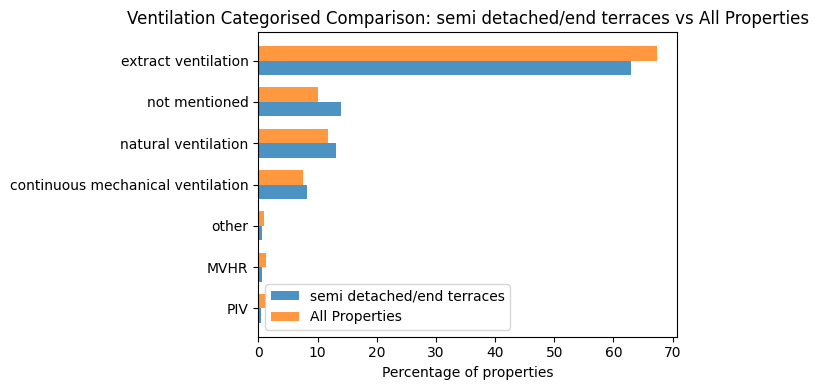

,Count,% of semi detached/end terraces,% of All Properties
ventilation_categorised,,,
MVHR,2,0.7,1.3
PIV,1,0.4,1.1
continuous mechanical ventilation,22,8.2,7.5
extract ventilation,168,62.9,67.4
natural ventilation,35,13.1,11.7
not mentioned,37,13.9,10.1
other,2,0.7,0.9


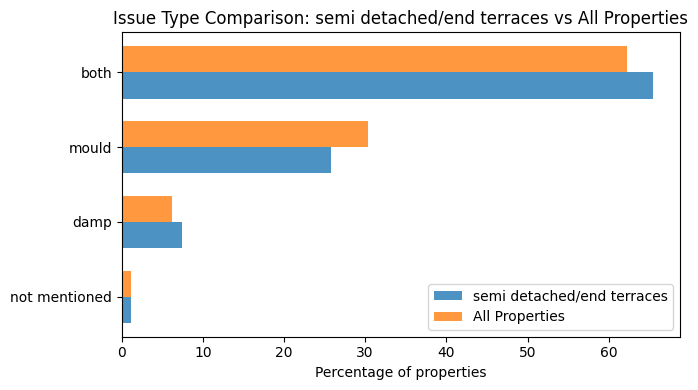

,Count,% of semi detached/end terraces,% of All Properties
issue_type,,,
both,175,65.5,62.3
mould,69,25.8,30.3
damp,20,7.5,6.2
not mentioned,3,1.1,1.2


In [44]:
semi_df = profile_by_feature(df, "property_type_categorised", "semi-detached/end terrace")

# Generate tables
for col in ["wall_type", "ventilation_categorised", "issue_type"]:
    display(feature_summary_table(df, semi_df, col, "semi detached/end terraces"))
    print("\n")

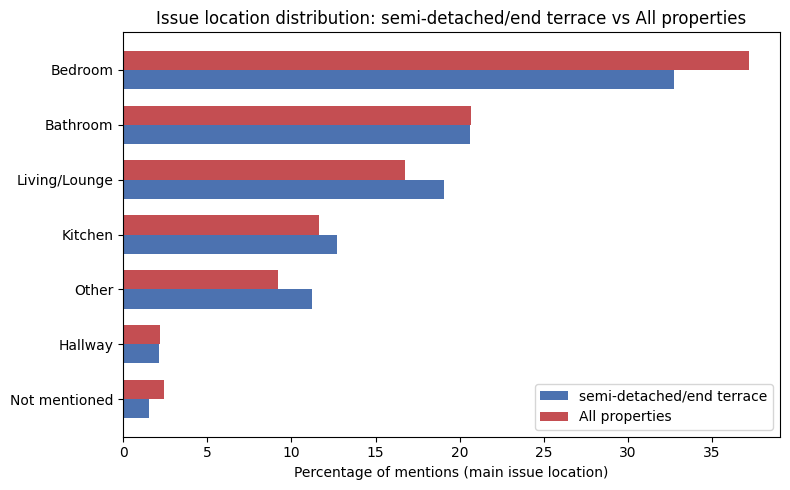

,semi-detached/end terrace,All
main_issue_location_categorised,,
Not mentioned,1.5,2.4
Hallway,2.1,2.2
Other,11.2,9.2
Kitchen,12.7,11.6
Living/Lounge,19.1,16.8
Bathroom,20.6,20.7
Bedroom,32.7,37.2


In [45]:
compare_issue_locations(df, "semi-detached/end terrace")

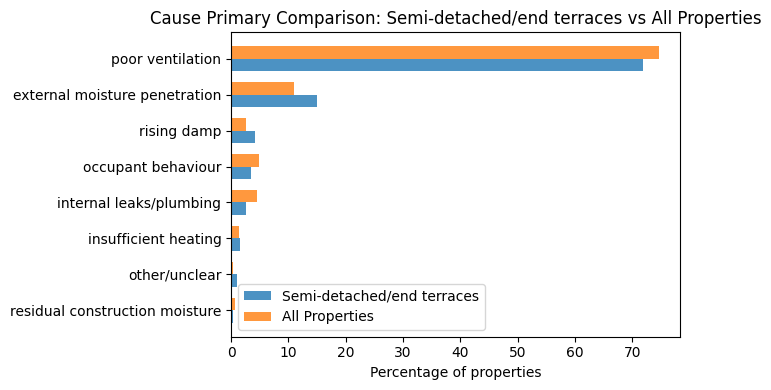

,Count,% of Semi-detached/end terraces,% of All Properties
cause_primary,,,
external moisture penetration,40,15.0,10.9
insufficient heating,4,1.5,1.4
internal leaks/plumbing,7,2.6,4.6
occupant behaviour,9,3.4,4.9
other/unclear,3,1.1,0.4
poor ventilation,192,71.9,74.6
residual construction moisture,1,0.4,0.6
rising damp,11,4.1,2.6


In [46]:
display(feature_summary_table(df, semi_df, "cause_primary", "Semi-detached/end terraces"))

## Detached house profile

Profile: detached
Number of reports: 68 (6.8% of total)


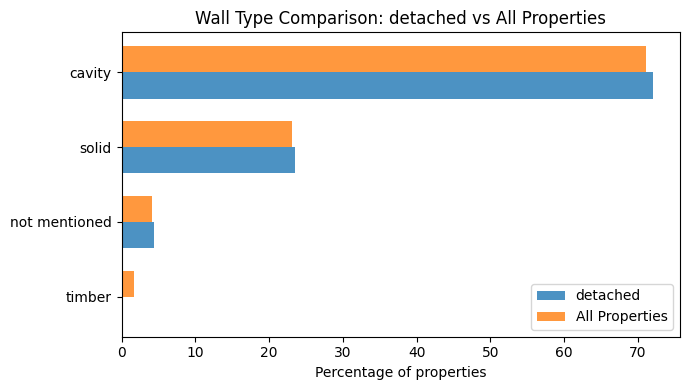

,Count,% of detached,% of All Properties
wall_type,,,
cavity,49.0,72.1,71.1
not mentioned,3.0,4.4,4.1
solid,16.0,23.5,23.1
timber,0.0,0.0,1.7


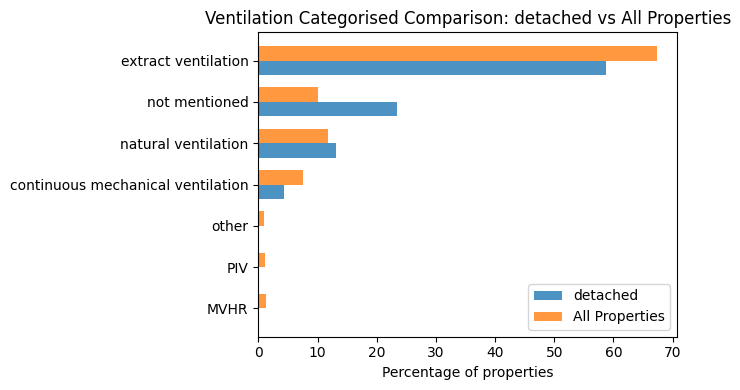

,Count,% of detached,% of All Properties
ventilation_categorised,,,
MVHR,0.0,0.0,1.3
PIV,0.0,0.0,1.1
continuous mechanical ventilation,3.0,4.4,7.5
extract ventilation,40.0,58.8,67.4
natural ventilation,9.0,13.2,11.7
not mentioned,16.0,23.5,10.1
other,0.0,0.0,0.9


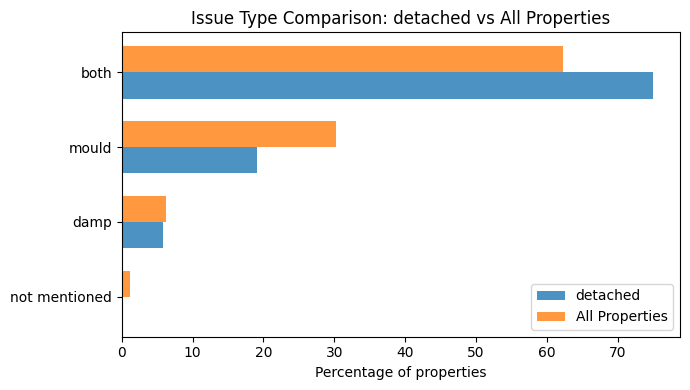

,Count,% of detached,% of All Properties
issue_type,,,
both,51.0,75.0,62.3
damp,4.0,5.9,6.2
mould,13.0,19.1,30.3
not mentioned,0.0,0.0,1.2


In [47]:
detached_df = profile_by_feature(df, "property_type_categorised", "detached")

# Generate tables
for col in ["wall_type", "ventilation_categorised", "issue_type"]:
    display(feature_summary_table(df, detached_df, col, "detached"))
    print("\n")

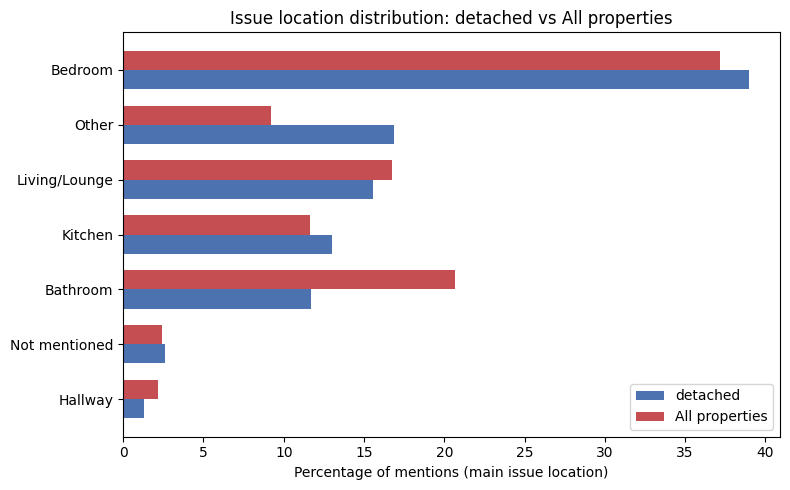

,detached,All
main_issue_location_categorised,,
Hallway,1.3,2.2
Not mentioned,2.6,2.4
Bathroom,11.7,20.7
Kitchen,13.0,11.6
Living/Lounge,15.6,16.8
Other,16.9,9.2
Bedroom,39.0,37.2


In [48]:
compare_issue_locations(df, "detached")

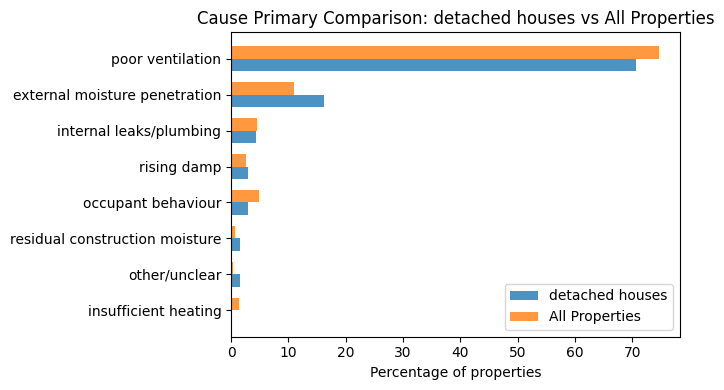

,Count,% of detached houses,% of All Properties
cause_primary,,,
external moisture penetration,11.0,16.2,10.9
insufficient heating,0.0,0.0,1.4
internal leaks/plumbing,3.0,4.4,4.6
occupant behaviour,2.0,2.9,4.9
other/unclear,1.0,1.5,0.4
poor ventilation,48.0,70.6,74.6
residual construction moisture,1.0,1.5,0.6
rising damp,2.0,2.9,2.6


In [49]:
display(feature_summary_table(df, detached_df, "cause_primary", "detached houses"))

# Wall types

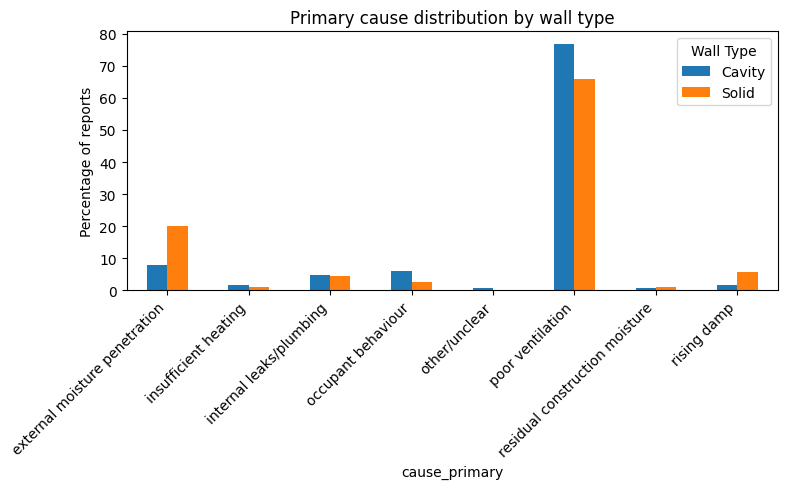

In [51]:
cavity_df = df[df['wall_type']=='cavity'].copy()
solid_df = df[df['wall_type']=='solid'].copy()

cause_cavity = cavity_df["cause_primary"].value_counts(normalize=True) * 100
cause_solid = solid_df["cause_primary"].value_counts(normalize=True) * 100

cause_compare = pd.concat([cause_cavity, cause_solid], axis=1, keys=["Cavity", "Solid"]).fillna(0)
cause_compare = cause_compare.sort_index()

cause_compare.plot(kind="bar", figsize=(8,5))
plt.title("Primary cause distribution by wall type")
plt.ylabel("Percentage of reports")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Wall Type")
plt.tight_layout()
plt.show()


In [54]:
def plot_location_by_wall(df, title_suffix="All properties"):
    df = df.assign(wall_type=df["wall_type"].str.strip().str.lower())
    df = df[df["wall_type"].isin(["solid", "cavity"])].copy()
    exploded = df.assign(location=df["main_issue_location_categorised"].str.split(", ")).explode("location")

    cross = pd.crosstab(exploded["location"], exploded["wall_type"], normalize="columns") * 100
    cross = cross[["cavity", "solid"]]

    cross.plot(kind="bar", figsize=(8, 5), width=0.75, color=["#4C72B0", "#C44E52"])
    plt.title(f"Issue locations by wall type (Cavity vs Solid) — {title_suffix}")
    plt.ylabel("Percentage of mentions")
    plt.xlabel("Location")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Wall Type")
    plt.tight_layout()
    plt.show()

    return cross.round(1)



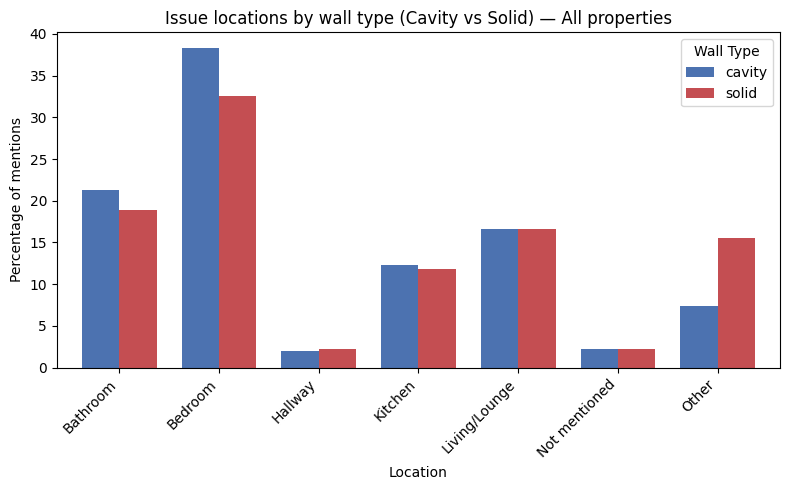

wall_type,cavity,solid
location,,
Bathroom,21.3,18.9
Bedroom,38.3,32.6
Hallway,2.0,2.2
Kitchen,12.3,11.9
Living/Lounge,16.7,16.7
Not mentioned,2.2,2.2
Other,7.4,15.6


In [55]:
plot_location_by_wall(df)

# Drying Clothes

In [58]:
drying_yes_df = df[df["drying_clothes"] == "yes"].copy()


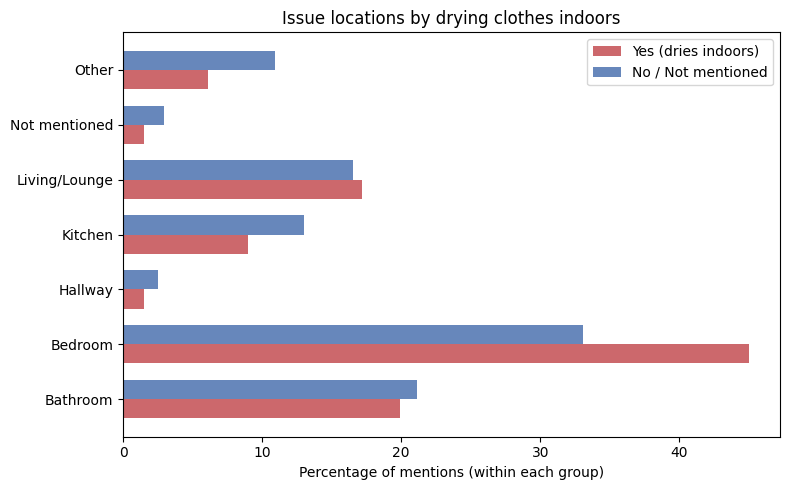

drying_clothes_grouped,yes,no/not mentioned
location,,
Bathroom,19.9,21.1
Bedroom,45.0,33.1
Hallway,1.5,2.5
Kitchen,9.0,13.0
Living/Lounge,17.2,16.5
Not mentioned,1.5,2.9
Other,6.1,10.9


In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 1️⃣ Normalise and group drying clothes values ---
df["drying_clothes_grouped"] = (
    df["drying_clothes"]
    .str.strip()
    .str.lower()
    .replace({"no": "no/not mentioned", "not mentioned": "no/not mentioned"})
)

# --- 2️⃣ Explode main issue locations ---
main_exploded = df.assign(
    location=df["main_issue_location_categorised"].str.split(", ")
).explode("location")

# --- 3️⃣ Create cross-tab (percentage within each drying group) ---
cross_perc = (
    pd.crosstab(main_exploded["location"], main_exploded["drying_clothes_grouped"], normalize="columns") * 100
).round(1)

# Ensure column order
if "yes" in cross_perc.columns and "no/not mentioned" in cross_perc.columns:
    cross_perc = cross_perc[["yes", "no/not mentioned"]]

# --- 4️⃣ Plot side-by-side bars ---
bar_height = 0.35
locations = np.arange(len(cross_perc))

plt.figure(figsize=(8, 5))
plt.barh(locations - bar_height/2, cross_perc["yes"], height=bar_height, label="Yes (dries indoors)", color="#C44E52", alpha=0.85)
plt.barh(locations + bar_height/2, cross_perc["no/not mentioned"], height=bar_height, label="No / Not mentioned", color="#4C72B0", alpha=0.85)

plt.yticks(locations, cross_perc.index)
plt.xlabel("Percentage of mentions (within each group)")
plt.title("Issue locations by drying clothes indoors")
plt.legend()
plt.tight_layout()
plt.show()

display(cross_perc)
